In [1]:
# Copyright [2024] Stefan Dendorfer
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
'''We use the results from NATS-Bench paper https://arxiv.org/abs/2009.00437.
Table 4, Comparison on NATS-Bench topology search. The mean and variance is 
reported with 500 runs. Both interpretations of the second value being the 
variance(squared standard deviation) and the biased standard deviation are
explored.'''

table4 = {
  "CIFAR-10": {
    "validation": {
      "RANDOM": [91.07, 0.26],
      "REINFORCE": [91.12, 0.25],
      "BOHB": [91.17, 0.27],
      "REA": [91.25, 0.31]
    },
    "test": {
      "RANDOM": [93.86, 0.23],
      "REINFORCE": [93.9, 0.26],
      "BOHB": [93.94, 0.28],
      "REA": [94.02, 0.31]
    }
  },
  "CIFAR-100": {
    "validation": {
      "RANDOM": [71.46, 0.97],
      "REINFORCE": [71.8, 0.94],
      "BOHB": [72.04, 0.93],
      "REA": [72.28, 0.95]
    },
    "test": {
      "RANDOM": [71.55, 0.97],
      "REINFORCE": [71.86, 0.89],
      "BOHB": [72.0, 0.86],
      "REA": [72.23, 0.84]
    }
  },
  "ImageNet-16-120": {
    "validation": {
      "RANDOM": [45.03, 0.91],
      "REINFORCE": [45.37, 0.74],
      "BOHB": [45.55, 0.79],
      "REA": [45.71, 0.77]
    },
    "test": {
      "RANDOM": [45.28, 0.97],
      "REINFORCE": [45.64, 0.78],
      "BOHB": [45.7, 0.86],
      "REA": [45.77, 0.8]
    }
  }
}

# colors from tableau-colorblind10
tc = {
    'Blue': '#5F9ED1',
    'Dark Orange': '#FF800E',
    'Red Orange': '#C85200',
    'Dark Gray': '#898989',
}
colors = [tc["Red Orange"],  tc["Blue"], tc["Dark Gray"], tc["Dark Orange"],]


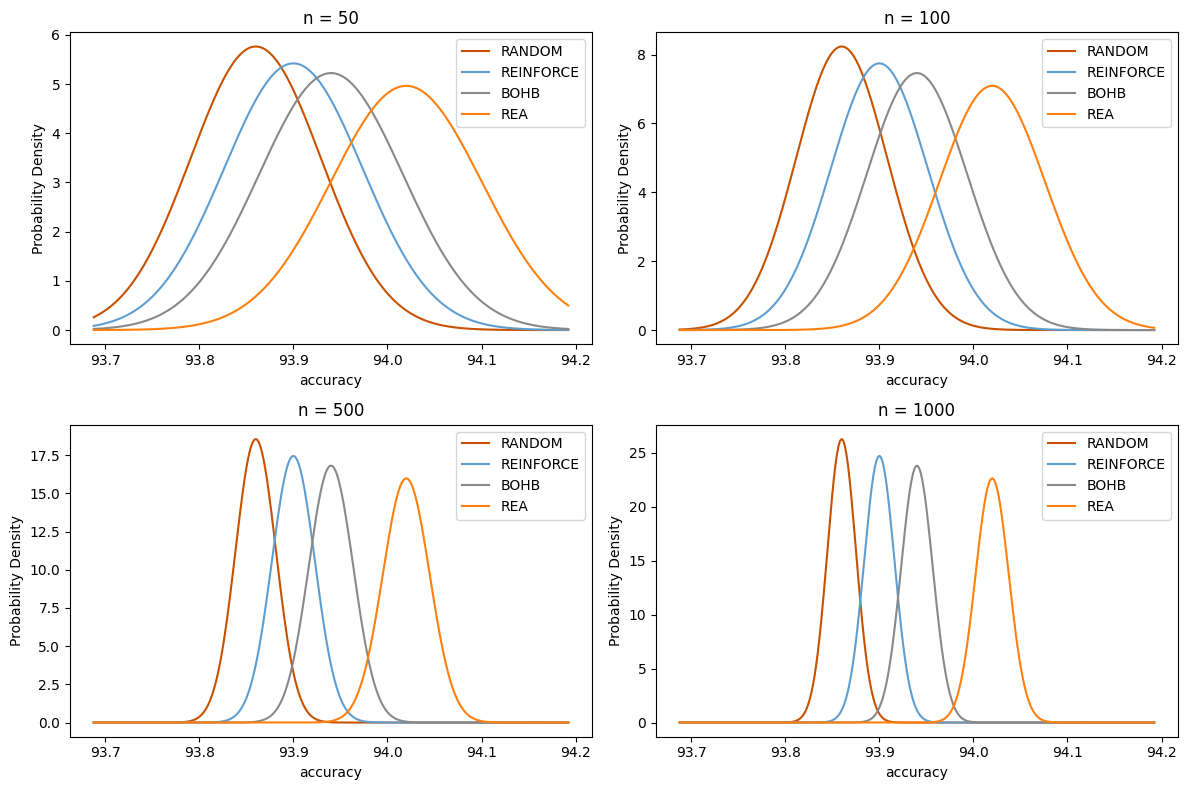

In [3]:
''''Here, we use the data (mean and variance) from the 500 runs and simulate the
data as if it was the mean and variance from 50,100, or 1000 runs. We show how
due to the central limit theorem given these 4 initial experiments with 50,100,
500 and 1000 runs respectivley would expect a new sample mean from a repeated 
experiment according to these means.'''


# experiment around 
dataset = "CIFAR-10" # CIFAR-100, ImageNet-16-120 
mode = "test" # validation
assume_variance = True # True interprets the second value as variance

data = table4[dataset][mode]

# some automatic tuning for the limits
values = [value[0] for _, value in data.items()]
stdevs = [value[1] for _, value in data.items()]
extra = max(stdevs)/1.8
x_linspace = np.linspace(min(values)-extra, max(values)+extra, 300)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()
n_values = [50, 100, 500, 1000]

for i, n in enumerate(n_values):
    ax = axs[i]
    ax.set_title(f'n = {n}')
    ax.set_xlabel('accuracy')
    ax.set_ylabel('Probability Density')
    c = 0
    for key, value in data.items():
        mean = value[0]

        # Depending on whether assumes as variance (sigma^2), we correct the 
        # value from biased to unbiased estimator of population.
        if assume_variance:
            std_dev = math.sqrt(value[1]) * n / (n-1)
        else: 
            std_dev = value[1] * n / (n-1)

        # Due tocentral limit theorem, we calculate the standard deviation of 
        # the sampling distribution of the mean.
        std = std_dev / math.sqrt(n)
        y_values = norm.pdf(x_linspace, mean, std)
        ax.plot(x_linspace, y_values, label=key, color=colors[c])
        c+=1

    ax.legend()

plt.tight_layout()
plt.show()